# Planet : Amazon space

In [1]:
import os
import torch
import pandas as pd
#from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms
import torchvision.transforms.functional
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms#, io
import torch.nn as nn
from torchinfo import summary

import torchvision.transforms.functional as F

C:\Users\gezas\anaconda3\envs\IPEO\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_folder = '../IPEO_Planet_project'
if not os.path.exists(data_folder):
    data_folder = input("Enter the data folder path: ")
    assert os.path.exists(data_folder), "I did not find the folder at, "+str(data_folder)

# Loading the dataset

### Understanding the labels

In [3]:
labels_dt = pd.read_csv(f'{data_folder}/train_labels.csv',dtype=str)
print(labels_dt.head())
print(f" \n Shape of the initial dataset {labels_dt.shape}")

  image_name                                       tags
0    train_0                               haze primary
1    train_1            agriculture clear primary water
2    train_2                              clear primary
3    train_3                              clear primary
4    train_4  agriculture clear habitation primary road
 
 Shape of the initial dataset (40479, 2)


In [4]:
label_test =  labels_dt.iloc[0,1]
print(label_test)
print(type(label_test))
print(f'Splited labels example: {label_test.split()}')

haze primary
<class 'str'>
Splited labels example: ['haze', 'primary']


In [79]:
tags = labels_dt['tags'].str.split(expand=True).stack().unique()
print(F"Unique tags are: \n{tags}")
print(len(tags))

Unique tags are: 
['haze' 'primary' 'agriculture' 'clear' 'water' 'habitation' 'road'
 'cultivation' 'slash_burn' 'cloudy' 'partly_cloudy' 'conventional_mine'
 'bare_ground' 'artisinal_mine' 'blooming' 'selective_logging' 'blow_down']
17


In [6]:
for tag in tags:
     a = [(tag in i.split()) for i in labels_dt['tags']]
     new_col = np.zeros(len(a),dtype=int)+a
     #print(new_col.shape)
     labels_dt[tag]=new_col

In [7]:
labels_dt

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40474,train_40474,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
40475,train_40475,cloudy,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
40476,train_40476,agriculture clear primary,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
40477,train_40477,agriculture clear primary road,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [8]:
labels_dt[tags]

,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40474,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
40475,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
40476,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
40477,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0


### Understanding the images

In [10]:
from torchvision import io

../IPEO_Planet_project/train-jpg\train_5.jpg


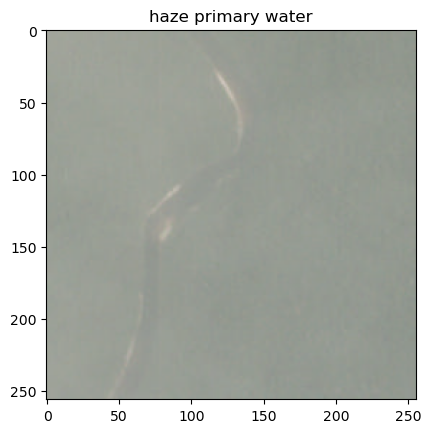

In [14]:
id_test = 5
img_name_test = os.path.join(f'{data_folder}/train-jpg', labels_dt.iloc[id_test, 0])
img_name_test = f'{img_name_test}.jpg'
print(img_name_test)

plt.figure()
plt.title(labels_dt.iloc[id_test,1])
image = io.read_image(img_name_test)
img = F.to_pil_image(image)
plt.imshow(img)

## Custom made Class for multilabel classification

See this tutorial for help:
<https://pytorch.org/tutorials/beginner/data_loading_tutorial.html>

In [25]:
class AmazonSpaces(Dataset):
    """Amazon aerial image dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with labels.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.labels = pd.read_csv(csv_file)
        self.tags = self.labels['tags'].str.split(expand=True).stack().unique()
        for tag in self.tags:
            a = [(tag in i.split()) for i in self.labels['tags']]
            self.labels[tag]=np.zeros(len(a),dtype=int)+a

        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.labels.iloc[idx, 0])
        img_name = f'{img_name}.jpg'

        image = io.read_image(img_name)
        labels = self.labels.loc[idx, self.tags]
        
        #other output
        #sample = {'image': image, 'labels': labels}

        if self.transform:
            image = self.transform(image)

        return image, labels

In [26]:
Amazon_dataset = AmazonSpaces(csv_file=f'{data_folder}/train_labels.csv',
                                    root_dir=f'{data_folder}/train-jpg')

## Having some fun with transforms
Just testing some transforms and how to implement into dataset
First creating and Adjust_Saturation class to be able to apply adjust_saturation the same way as the other transforms class

In [27]:
class AdjustSaturation(object):
    """Adjust the saturation of a tensor image.
    Args:
        saturation factor (float): if 0 -> black and white, if 1 -> same as the input
    """

    def __init__(self, saturation_factor):
        assert isinstance(saturation_factor, (int,float))
        self.saturation_factor = saturation_factor

    def __call__(self, img):
        new_tensor = transforms.functional.adjust_saturation(img, self.saturation_factor)

        return new_tensor

In [28]:
Test_transforms = transforms.Compose([transforms.ToTensor(),transforms.CenterCrop(256),transforms.RandomAutocontrast(p=1), AdjustSaturation(2)])

In [29]:
transformed_dataset = AmazonSpaces(csv_file=f'{data_folder}/train_labels.csv',
                                    root_dir=f'{data_folder}/train-jpg', transform=Test_transforms)

## Visualizing the two datasets:
1) The dataset without transforms

In [38]:
id_test = 5
img, labels = Amazon_dataset[id_test]
print(labels)

1


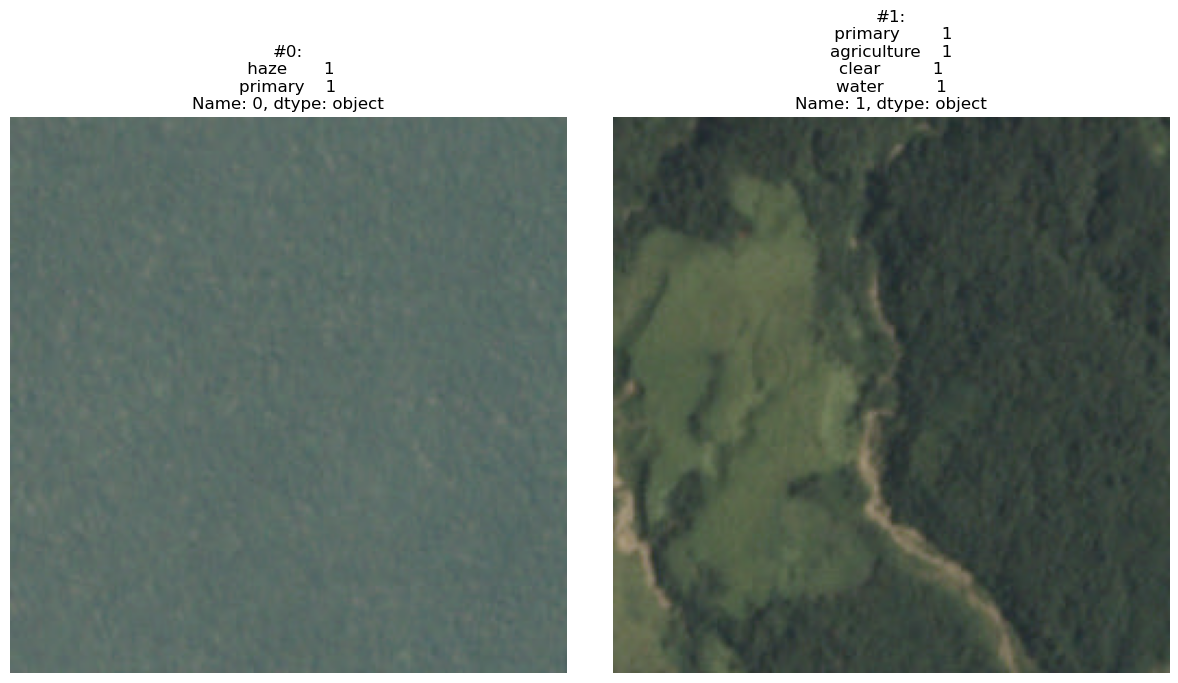

In [45]:
plt.figure(figsize=(12,10))

N=1

for i in range(len(Amazon_dataset)):
    #sample = Amazon_dataset[i]
    #print(i, sample['image'].shape, sample['labels']) #old class output
    #labels = sample['labels']
    #image = sample['image']
    image, labels = Amazon_dataset[i]
    #print(i, type(image), len(labels))
    ax = plt.subplot(1, N+1, i + 1)
    plt.tight_layout()
    ax.set_title(f'#{i}:\n {labels[labels == 1]}')
    ax.axis('off')
    img = F.to_pil_image(image)
    ax.imshow(img)
    if i == N:
        plt.show()
        break

2) Then the one with tranforms

In [47]:
plt.figure(figsize=(12,10))

for i in range(len(transformed_dataset)):
    ## old class output:
    #sample = transformed_dataset[i]
    #print(i, sample['image'].shape, sample['labels'])
    #labels = sample['labels']
    #image = sample['image']

    image,labels = transformed_dataset[i] #new clas output

    print(i, image.shape, len(labels))
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title(f'#{i}:\n {labels}')
    ax.axis('off')
    img = F.to_pil_image(image)
    ax.imshow(img)
    if i == 3:
        plt.show()
        break

TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

<Figure size 1200x1000 with 0 Axes>

# Into Dataloader

In [15]:
train_loader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=0)

## Testing with plotting

In [16]:
# Helper function to show a batch
def show_image_batch(sample_batched):
    images_batch, labels = sample_batched['image'], sample_batched['labels'] #old class output
    #images_batch, labels = sample_batched
    batch_size = len(images_batch)
    fig, axs = plt.subplots(1, batch_size)
    for i in range(batch_size):
        img = F.to_pil_image(images_batch[i])
        axs[i].imshow(img)
        axs[i].set_title(f'#{i}:\n {labels[i]}')
    fig.set_figheight(10)
    fig.set_figwidth(12)
    plt.tight_layout()
    plt.show()

In [17]:

i_batch = 0
for sample_batched in train_loader:
    # observe 4th batch and stop.
    if i_batch == 3:
        show_image_batch(sample_batched)
        break

RuntimeError: each element in list of batch should be of equal size

# Multi-Layer convulotional network
## Model

* torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
* torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
* torch.nn.BatchNorm1d(num_features, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True, device=None, dtype=None)

In [90]:
class MultiLayerCNN(nn.Module):
    def __init__(self):
        super(MultiLayerCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size = 5) #Input is a 3 plane 256x256 tensor (RBB) -> output 10 planes of 254x254
        self.pool_max = nn.MaxPool2d(2, 2) #output of dim-2 x dim-2
        self.conv2 = nn.Conv2d(10, 20, 5) #input 10 planes 127x127, output 20 planes of 125x125
        self.pool_avg = nn.AvgPool2d(4,4)
        self.fc = nn.Linear(20*27*27,17) #single dense layer for the network
        self.batchNorm = nn.BatchNorm1d(256)
        self.loss = nn.BCELoss()
        self.sig = nn.Sigmoid()

    def forward(self, x):
        x = self.batchNorm(x)
        print(f"step 1 : {x.shape}")
        x = self.pool_max(nn.functional.relu(self.conv1(x)))
        print(f"step 2 : {x.shape}")
        x = self.pool_avg(x)
        print(f"step 3 : {x.shape}")
        x = nn.functional.relu(self.conv2(x))
        print(f"step 4 : {x.shape}")
        x = x.view(-1, 20*27*27)
        print(f"step 5 : {x.shape}")
        x = self.fc(x)
        return x

In [91]:
net = MultiLayerCNN()
summary(net,input_size=(3,256,256))

step 1 : torch.Size([3, 256, 256])
step 2 : torch.Size([10, 126, 126])
step 3 : torch.Size([10, 31, 31])
step 4 : torch.Size([20, 27, 27])
step 5 : torch.Size([1, 14580])


Layer (type:depth-idx)                   Output Shape              Param #
MultiLayerCNN                            [1, 17]                   --
├─BatchNorm1d: 1-1                       [3, 256, 256]             512
├─Conv2d: 1-2                            [10, 252, 252]            760
├─MaxPool2d: 1-3                         [10, 126, 126]            --
├─AvgPool2d: 1-4                         [10, 31, 31]              --
├─Conv2d: 1-5                            [20, 27, 27]              5,020
├─Linear: 1-6                            [1, 17]                   247,877
Total params: 254,169
Trainable params: 254,169
Non-trainable params: 0
Total mult-adds (M): 4.88
Input size (MB): 0.79
Forward/backward pass size (MB): 6.77
Params size (MB): 1.02
Estimated Total Size (MB): 8.57

## Training, Validation and accuracy functions

In [93]:
def validate(net, dataloader,loss_fn=nn.BCELoss()):
    net.eval()
    count,acc,loss = 0,0,0
    with torch.no_grad():
        for features,labels in dataloader:
            out = net(features)
            loss += loss_fn(out,labels)
            pred = torch.max(out,1)[1]
            acc += (pred==labels).sum()
            count += len(labels)
    return loss.item()/count, acc.item()/count

In [94]:
def train_epoch(net,dataloader,lr=0.01,optimizer=None,loss_fn = nn.NLLLoss()):
    optimizer = optimizer or torch.optim.Adam(net.parameters(),lr=lr)
    net.train()
    total_loss,acc,count = 0,0,0
    for features,labels in dataloader:
        optimizer.zero_grad()
        out = net(features)
        loss = loss_fn(out,labels) #cross_entropy(out,labels)
        loss.backward()
        optimizer.step()
        total_loss+=loss
        _,predicted = torch.max(out,1)
        acc+=(predicted==labels).sum()
        count+=len(labels)
    return total_loss.item()/count, acc.item()/count

In [96]:
def train(net,train_loader,test_loader,optimizer=None,lr=0.01,epochs=2,loss_fn=nn.NLLLoss()):
    optimizer = optimizer or torch.optim.Adam(net.parameters(),lr=lr)
    res = { 'train_loss' : [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    for ep in range(epochs):
        tl,ta = train_epoch(net,train_loader,optimizer=optimizer,lr=lr,loss_fn=loss_fn)
        vl,va = validate(net,test_loader,loss_fn=loss_fn)
        print(f"Epoch {ep:2}, Train acc={ta:.3f}, Val acc={va:.3f}, Train loss={tl:.3f}, Val loss={vl:.3f}")
        res['train_loss'].append(tl)
        res['train_acc'].append(ta)
        res['val_loss'].append(vl)
        res['val_acc'].append(va)
    return res